## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[31, 50, 67],
       [ 8, 52, 70],
       [ 1, 36, 72],
       [49, 78, 85],
       [33, 42, 90],
       [59, 74, 81]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([31, 50, 67]), array([ 8, 52, 70]))

In [5]:
import pandas as pd

The lowest card in the game is

In [6]:
np.min(cards)

1

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [7]:
# To Do cell
samples = np.zeros((100000,))
for s in range(100000):
    curr_min = np.min(sample_cards(100, 6, 3))
    samples[s] = curr_min

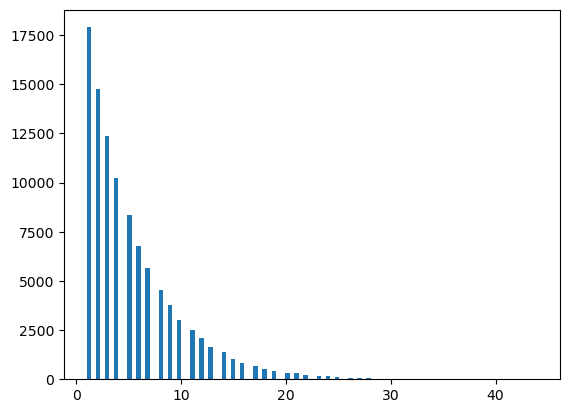

In [8]:

plt.hist(samples, bins=100)
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [9]:
# To Do cell
def plot_1(players, n, cards, cards_per_capita):
    deltas1 = np.zeros((n,))
    for s in range(n):
        curr_sample = sample_cards(cards, players, cards_per_capita)
        curr_sample = curr_sample.flatten()
        sort_sample = sorted(curr_sample)
        all_sorted = [sort_sample[j+1] - sort_sample[j] for j in range(len(sort_sample) - 1)]
        curr_delta = np.max(all_sorted)
        deltas1[s] = curr_delta
    return deltas1


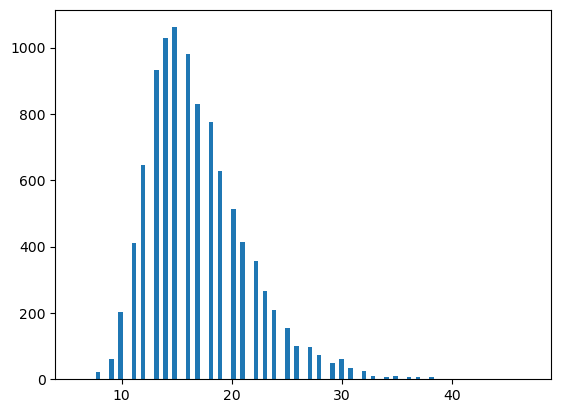

In [10]:
plt.hist(plot_1(6, 10000, 100, 3), bins=100)
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [11]:
# To Do cell


def compute_self_exc_gap(players, cards, cards_per_capita):
        player_ids = np.tile(np.arange(1, players+1), 
                              (cards_per_capita, 1)).T
        flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
        order_ids = np.argsort(flat_cards)
        gap_cards = np.diff(flat_cards[order_ids])
        gap_ids = np.diff(flat_ids[order_ids])
        gap_unique = gap_cards*(gap_ids != 0)
        return np.max(gap_unique)
    


def plot_2(players, n, cards, cards_per_capita):   
    deltas2 = np.zeros((n,))
    for s in range(n):
        curr_sample = sample_cards(cards, players, cards_per_capita)
        curr_delta = compute_self_exc_gap(players, curr_sample, cards_per_capita)
        deltas2[s] = curr_delta
    return deltas2


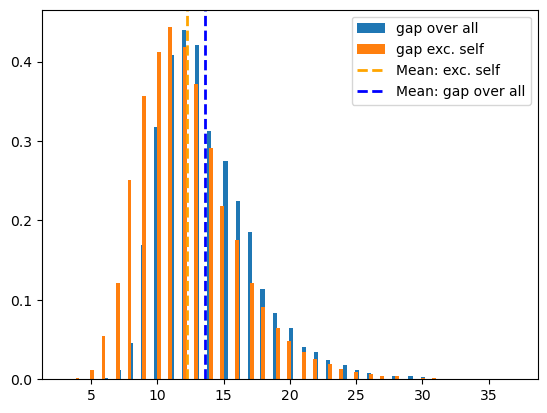

In [12]:
plt.hist(plot_1(3, 10000, 100, 8), bins=100,density=True, label='gap over all')
plt.hist(plot_2(3, 10000, 100, 8),density=True, bins=100, label='gap exc. self')
plt.axvline(x=np.mean(plot_2(3, 10000, 100, 8)), color='orange', linestyle='--', linewidth=2, label='Mean: exc. self')
plt.axvline(x=np.mean(plot_1(3, 10000, 100, 8)), color='blue', linestyle='--', linewidth=2, label='Mean: gap over all')
plt.legend()
plt.show()


How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

# To Do cell

From the plots below, we look at increasing number of players and cards per player separately. We can see that across both comparisons, the average max gap across several sample card drawings starts higher in the group where gap is considered overall. But, as number of players or cards increases, the average max gaps for both scenarios converge. It it worth noting that the max gap tends to decrease as we increase either number of players or cards per player.

### Different number of players

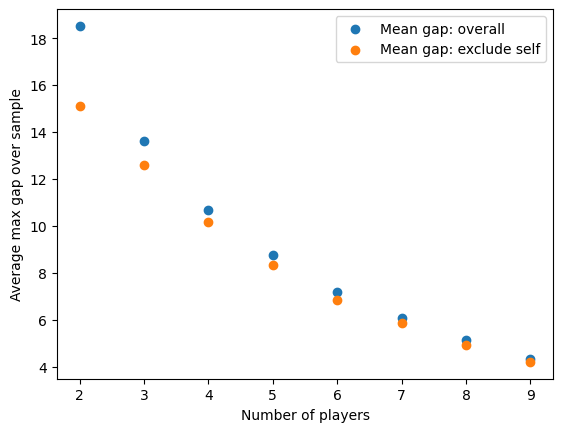

In [13]:
mean_gaps_1 = [np.mean(plot_1(n, 1000, 100, 8)) for n in range(2, 10)]
mean_gaps_2 = [np.mean(plot_2(n, 1000, 100, 8)) for n in range(2, 10)]
plt.scatter(np.arange(2,10), mean_gaps_1, label = 'Mean gap: overall')
plt.scatter(np.arange(2,10), mean_gaps_2, label = 'Mean gap: exclude self')
plt.xlabel("Number of players")
plt.ylabel("Average max gap over sample")
plt.legend()
plt.show()

### Different number of cards per player

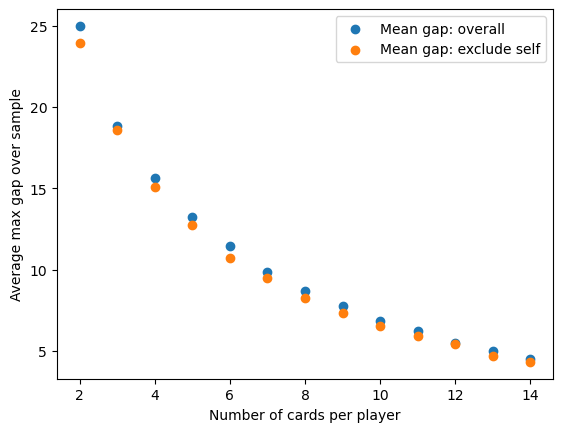

In [14]:
mean_gaps_1 = [np.mean(plot_1(5, 1000, 100, c)) for c in range(2, 15)]
mean_gaps_2 = [np.mean(plot_2(5, 1000, 100, c)) for c in range(2, 15)]
plt.scatter(np.arange(2,15), mean_gaps_1, label = 'Mean gap: overall')
plt.scatter(np.arange(2,15), mean_gaps_2, label = 'Mean gap: exclude self')
plt.xlabel("Number of cards per player")
plt.ylabel("Average max gap over sample")
plt.legend()
plt.show()

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

### for these problems, want to plot density on top to confirm our dist matches the actual density

# To Do cell


In real life, cards are dealt from a deck without replacement. Under this setup, we can easily create a hypergeometric R.V. by counting the number of even cards in a sample game. However, as we increase the deck size we are sampling cards from, we will asymptotically approximate a binomial distribution. Each dealt card is considered a trial for the purpose of the Binomial.

i.e., when we call sample_cards(s, players, hand_size) as s--> $\infty$, it will be equivalent to dealing cards from the deck __with__ replacement.

$X =$ number of even cards in a game containing $n =$ players*hand_size cards from a deck of size $s$.

$X = \sum^{n}_{i} 1_{\text{\{card}_i \text{   is even\}}}$


$X \sim \text{Binomial}(n, 1/2)$

In [15]:
sample_cards(100, 5, 4)


array([[  7,  17,  18,  92],
       [ 20,  26,  55,  84],
       [ 76,  82,  85,  97],
       [ 31,  39,  79,  80],
       [ 27,  35,  45, 100]])

In [16]:
def binom_empirical_sample(s, players, hand_size):
    aa=sample_cards(s, players, hand_size).flatten()
    evens = abs((aa % 2) - 1) 
    return sum(evens)

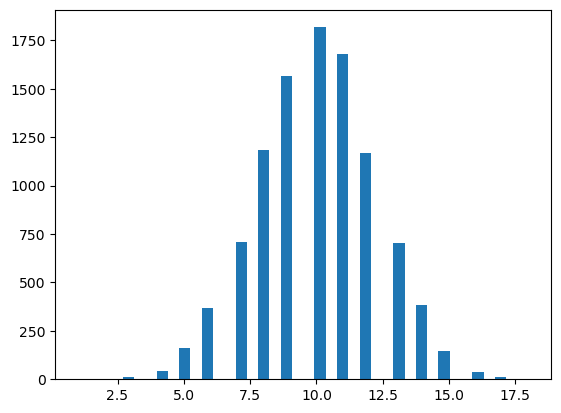

In [17]:
# number of successes
trials = 10000
players = 5
hands=4
plt.hist([binom_empirical_sample(s=10000, players=players, hand_size=hands) for _ in range(trials)], bins=40)
plt.show()

In [18]:
import scipy

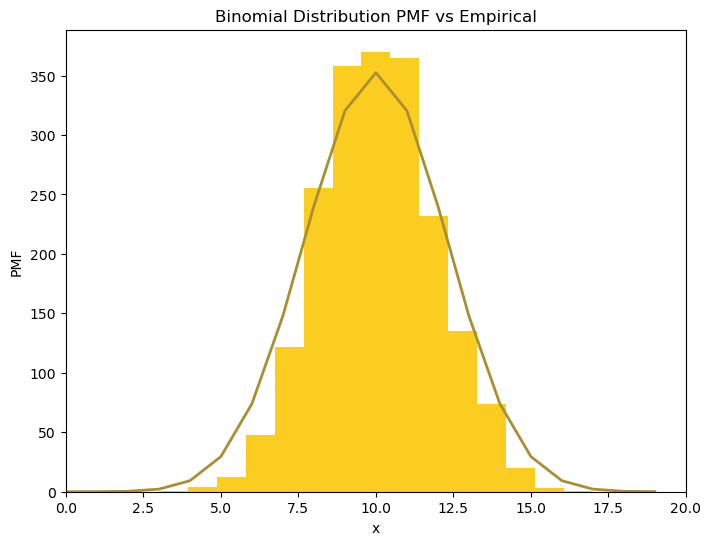

In [20]:
trials =2000
n = hands*players
k = np.arange(0, n)
pdf_values = scipy.stats.binom.pmf(k, n=n, p=0.5)
plt.figure(figsize=(8, 6))
plt.plot(k, pdf_values*trials, '#a88f32', lw=2, label='Binomial PMF (n={}, p=0.5)'.format(n))
plt.hist([binom_empirical_sample(s=100, players=players, hand_size=hands) for _ in range(trials)], color='#fccd21',bins=15)
plt.title('Binomial Distribution PMF vs Empirical')
plt.xlabel('x')
plt.xlim((0, 20))
plt.ylabel('PMF')
plt.show()


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

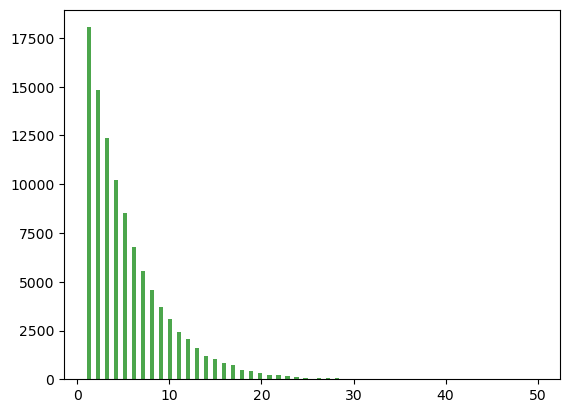

In [21]:
# To Do cell

# part1 copied
def plot_part1():
    samples = np.zeros((100000,))
    for s in range(100000):
        curr_min = np.min(sample_cards(100, 6, 3))
        samples[s] = curr_min
    plt.hist(samples,bins=100, color='g', alpha=0.7, label='Lowest in sample (part 1)')
    
plot_part1()

#### For the Beta distribution, k is the kth order statistic of interest (in this case, the first). n here is the number of cards dealt (players*hand_size). 

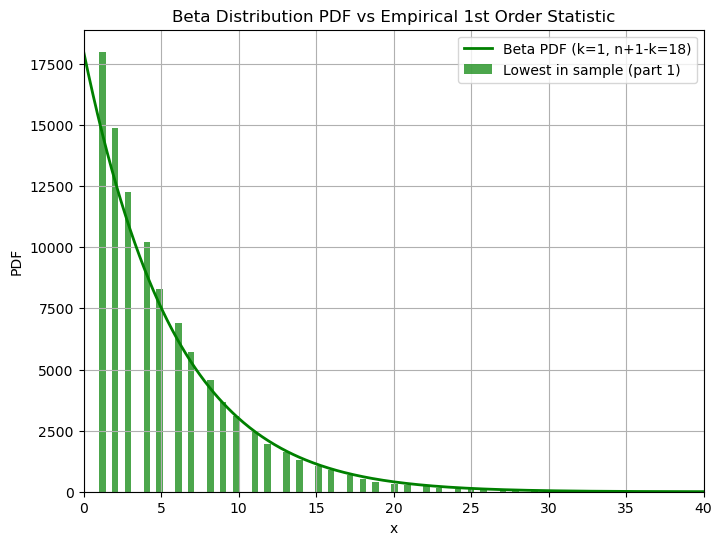

In [22]:
# n = players * hand_size since 1 <= k <= n. i.e. n is the total number of order statistics
x = np.linspace(0, 1, 1000)
k = 1
players = 6
handsize = 3
n = players*handsize
pdf_values = scipy.stats.beta.pdf(x, k, n+1-k)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(100*x, 1000*pdf_values, 'g-', lw=2, label='Beta PDF (k={}, n+1-k={})'.format(k, n+1-k))
plt.title('Beta Distribution PDF vs Empirical 1st Order Statistic')
plt.xlabel('x')
plt.xlim((0, 40))
plt.ylabel('PDF')

plt.grid(True)
plot_part1()
plt.legend()
plt.show()

### The distributions look nearly identical

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

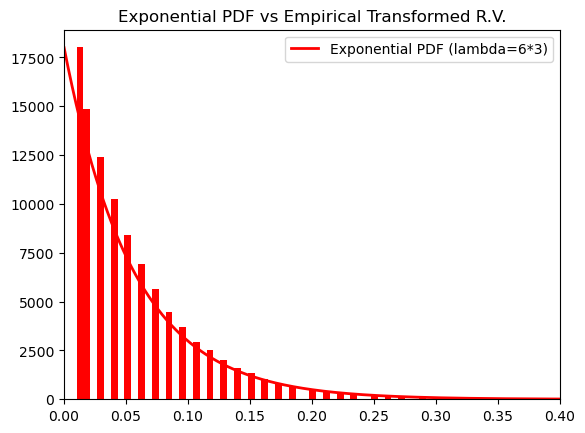

In [23]:
# part1 copied
N = 100
players = 6
hand_size = 3
samples = np.zeros((100000,))
for j in range(100000):

    curr_min = np.min(sample_cards(N, players, hand_size))
    samples[j] = -np.log(1 - curr_min/N)

# pdf_values = scipy.stats.exp.pdf(x, k, n+1-k)
x = np.linspace(0, 0.4, 1000)
n = 6
k = 3
t = n*k
pdf_values = t*np.exp(-t*x)
plt.hist(samples, bins=100, color='r')
plt.plot(x, 1000*pdf_values, 'r-', lw=2, label='Exponential PDF (lambda={}*{})'.format(n, k))
plt.xlim((0, 0.4))
plt.title("Exponential PDF vs Empirical Transformed R.V.")
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

# To Do cell

We compare the empirical distribution of the R.V. that resembles a Binomial.
Looking at the plot with number of cards=50, we see a rougher approximation compared to the case where N is 10,000. With larger number N, the empirical distribution is almost identical to a Binomial PMF.

As N becomes much larger than n*k, we get closer to the case where we are sampling with replacement. This is because 
the probability of dealing a repeat card becomes ever smaller as we increase the number of cards in the deck. Therefore,
the sampling strategies will lead to similar results when N is very large. And different results when N is small.

In [24]:
import seaborn as sns

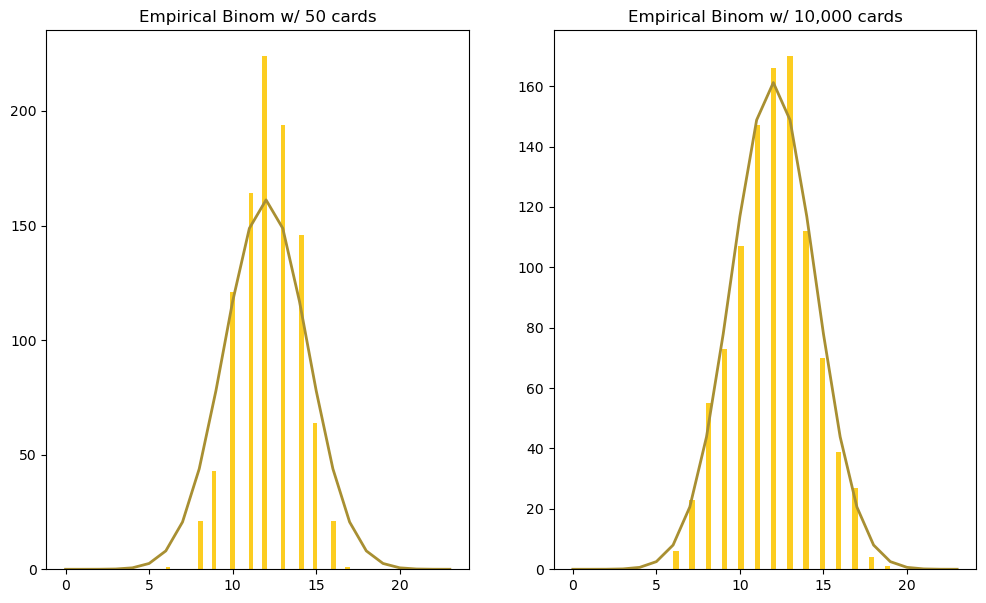

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 7) )
trials = 1000
n = hands*players
k = np.arange(0, n)
pdf_values = scipy.stats.binom.pmf(k, n=n, p=0.5)
# plt.figure(figsize=(8, 6))
ax1.plot(k, pdf_values*trials, '#a88f32', lw=2, label='Binomial PMF (n={}, p=0.5)'.format(n))
ax1.hist([binom_empirical_sample(s=50, players=players, hand_size=hands) for _ in range(trials)], color='#fccd21',bins=40)

ax2.plot(k, pdf_values*trials, '#a88f32', lw=2, label='Binomial PMF (n={}, p=0.5)'.format(n))
ax2.hist([binom_empirical_sample(s=10_000, players=players, hand_size=hands) for _ in range(trials)], color='#fccd21',bins=40)

ax1.set_title("Empirical Binom w/ 50 cards")
ax2.set_title("Empirical Binom w/ 10,000 cards")

plt.show()


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Rodrigo Palmaka (rpalmaka)
- Member No2: Nico Nunez (NicolasNunezSahr)
- Member No3: